In [31]:
from ipywidgets import interact

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def normalize_text(txt):
    txt = txt.upper()
    return txt
   
def get_normalized_length(txt):
    length = 0
    for x in txt:
        if alphabet.count(x) >= 1:
            length += 1
    return length

def create_dictionary(txt):
    dictionary = {}
    length = get_normalized_length(txt)
    for x in list(alphabet):
        dictionary[x] = (txt.count(x)/length)*100
    return dictionary

def get_frequency_plot(txt):
    test_dict = sorted(create_dictionary(txt).items())
    keys = [item[0] for item in test_dict]
    values = [item[1] for item in test_dict]
    plt.cla()
    plt.title("Frequency Plot of Enlsih Letters")
    plt.bar(range(len(keys)), values, width=0.8, color='g', label="Your Text")
    plt.xticks([i+0.4 for i in range(len(keys))], keys)
    plt.ylabel("Letter Frequency %")
    plt.plot()
    

In [32]:
def encrypt_caeser(text, shift):
    result = ""
    text = normalize_text(text)
    for i in range(len(text)): 
        char = text[i] 
        if alphabet.count(char) < 1:
            result += char
        else:
            result += chr((ord(char) + shift-65) % 26 + 65)
    return result

In [33]:
text="Text to encrypt"
shift=1

print(encrypt_caeser(text, shift))

UFYU UP FODSZQU


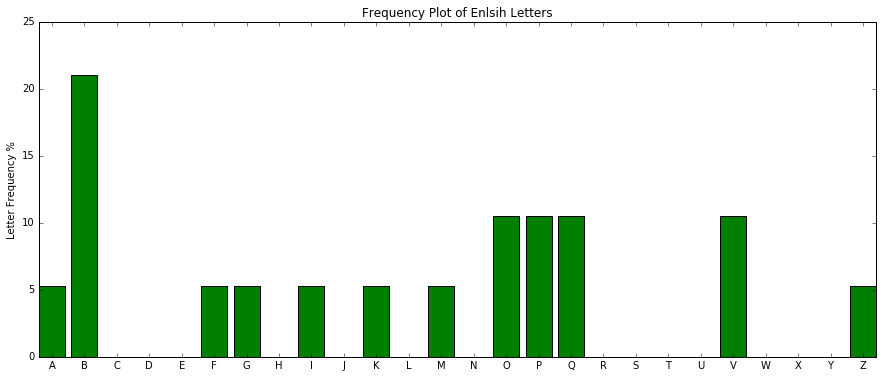

In [34]:
def plot_caeser_encrypted(text, shift):
    get_frequency_plot(encrypt_caeser(text, shift))
    
interact(plot_caeser_encrypted, text="Try changing this text", shift=(0,25))

In [35]:
def generate_key(text, key): 
    key = list(key) 
    if len(text) == len(key): 
        return(key) 
    else: 
        for i in range(len(text) - len(key)): 
            key.append(key[i % len(key)]) 
    return key

def encrypt_vigenere(text, key):
    text = normalize_text(text)
    key = normalize_text(key)
    key = generate_key(text, key)
    cipher_text = [] 
    for i in range(len(text)):
        if alphabet.count(text[i]) == 1:
            x = (ord(text[i]) + ord(key[i])) % 26
            x += ord('A') 
            cipher_text.append(chr(x)) 
        else:
            cipher_text.append(text[i])
    cipher_text = ''.join(cipher_text)
    return cipher_text

In [37]:
text = "Hello World"
key = "key"

print(encrypt_vigenere(text, key))

RIJVS GSPVH


<function __main__.plot_vigenere_encrypted>

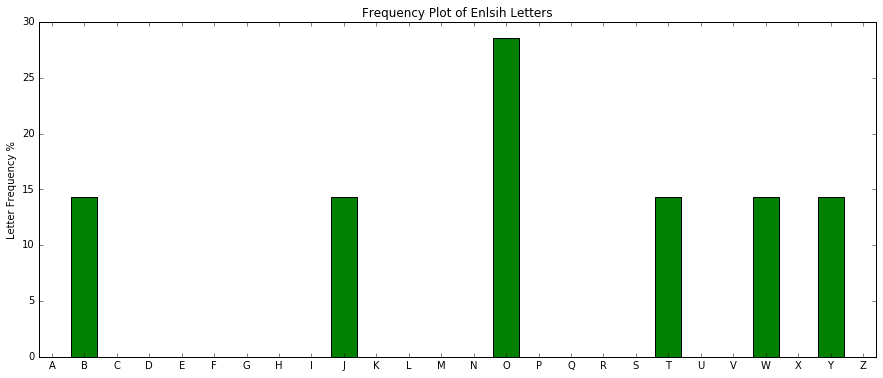

In [38]:
def plot_vigenere_encrypted(text, key):
    get_frequency_plot(encrypt_vigenere(text, key))

interact(plot_vigenere_encrypted, text="Example", key="key")

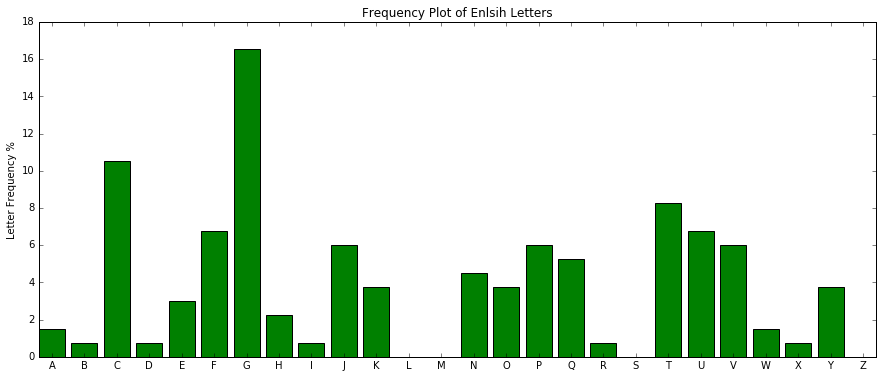

In [39]:
#ASSUMING THE CIPHERTEXT WAS GENEATED BY A KEYWORD OF LENGTH 1

#Here is a cipher text:

cipher_text = "QPEG VJGTG YCU C IKTN PCOGF GVJGN, YJQ YCU C FKUETGVG OCVJU YKB CV DTKUVQN. VJGP JGT RTQHGUUQT FGEKFGF JGT PCOG YCU CP QNF NCFA'U PCOG CPF OCFG HWP QH JGT GXGTA NGEVWTG"

get_frequency_plot(cipher_text)


In [42]:
english_letter_frequency = [
    ('A', 8.2), 
    ('B', 1.5), 
    ('C', 2.8), 
    ('D', 4.3), 
    ('E', 12.7), 
    ('F', 2.2), 
    ('G', 2.0), 
    ('H', 6.1), 
    ('I', 7.0),
    ('J', 0.15),
    ('K', 0.8), 
    ('L', 4.0), 
    ('M', 2.4), 
    ('N', 6.7), 
    ('O', 7.5), 
    ('P', 1.9), 
    ('Q', 0.1), 
    ('R', 6.0), 
    ('S', 6.3), 
    ('T', 9.1), 
    ('U', 2.8), 
    ('V', 1.0), 
    ('W', 2.4), 
    ('X', 0.15), 
    ('Y', 2.0), 
    ('Z', 0.07)]

keys = [item[0] for item in english_letter_frequency]
values = [item[1] for item in english_letter_frequency]

def decrytp_caeser(cipher_text, shift):
    result = ""
    # traverse text
    shift = shift.upper()
    shift = ord(shift)
    for i in range(len(cipher_text)): 
        char = cipher_text[i] 
        if alphabet.count(char) < 1:
            result += char
        else:
            result += chr((ord(char) - shift + 26) % 26 + ord('A'))
    return result

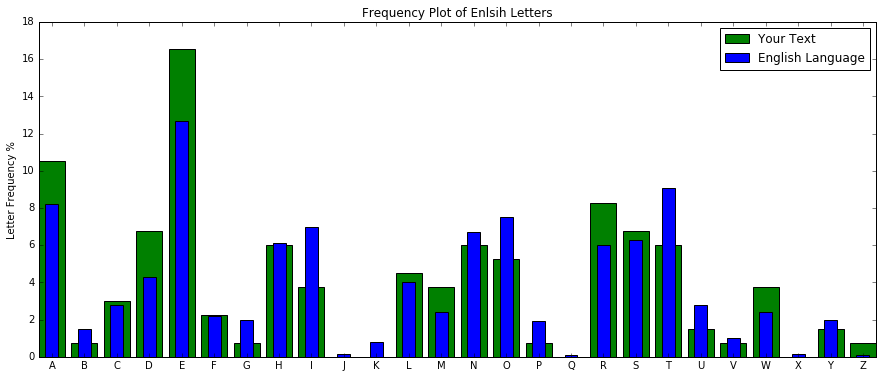

In [43]:
def plot_caeser_decrypted(cipher_text, shift):
    get_frequency_plot(decrytp_caeser(cipher_text, shift))
    plt.bar([i+0.2 for i in range(len(keys))], values, width=0.4, color='b', label='English Language')
    plt.legend()
    
interact(plot_caeser_decrypted, cipher_text=cipher_text, shift=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])